In [1]:
# in this notebook, I will try to fit a model relating the mean behavior of L4, L2/3, SST and VIP cells

In [2]:
# load the data

In [2]:
import pyute as ut
import autograd.numpy as np
import matplotlib.pyplot as plt
import sklearn
import h5py
import pdb
import scipy.optimize as sop
from autograd import elementwise_grad as egrad
from mpl_toolkits.mplot3d import Axes3D
import sklearn.discriminant_analysis as skd
import autograd.scipy.special as ssp
from autograd import jacobian
import size_contrast_analysis as sca
import scipy.stats as sst
%matplotlib notebook

/home/mossing/Documents/code/downloads/OASIS/oasis/functions.py:13: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  warn("Could not find cvxpy. Don't worry, you can still use OASIS, " +


In [3]:
    def compute_tuning(dsfile):
        with h5py.File(dsfile,mode='r') as f:
            keylist = [key for key in f.keys()]
            tuning = [None]*len(keylist)
            uparam = [None]*len(keylist)
            for ikey in range(len(keylist)):
#             try:
                session = f[keylist[ikey]]
                print(session)
                print([key for key in session.keys()])
                if 'size_contrast_0' in session:
                    sc0 = session['size_contrast_0']
                    data = sc0['decon'][:]
                    stim_id = sc0['stimulus_id'][:]
                    nbefore = sc0['nbefore'][()]
                    nafter = sc0['nafter'][()]
                    trialrun = sc0['running_speed_cm_s'][:,nbefore:-nafter].mean(-1)>10 #
                    print(sc0['running_speed_cm_s'].shape)
                    print(np.nanmean(trialrun))
                    if np.nanmean(trialrun)>0.4:
                        tuning[ikey] = ut.compute_tuning(data,stim_id,trial_criteria=trialrun)[:]
                    for param in sc0['stimulus_parameters']:
                        uparam[ikey] = sc0[param][:]
    #             except:
    #                 print('could not do '+keylist[ikey])
        return tuning,uparam

In [4]:
dsname_pc = '/home/mossing/Documents/notebooks/shared_data/pyr_l23_data_struct.hdf5'
tuning_pc,uparam_pc = compute_tuning(dsname_pc)

<HDF5 group "/session_181205_M10130" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1400, 31)
0.26785714285714285
<HDF5 group "/session_181209_M8536" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1400, 31)
0.1692857142857143
<HDF5 group "/session_181213_M8536" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1400, 47)
0.9614285714285714
<HDF5 group "/session_181214_M10130" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1400, 47)
0.5857142857142857
<HDF5 group "/session_190102_M10130" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(2400, 47)
0.5508333333333333
<HDF5 group 

/home/mossing/Documents/code/adesnal/pyute.py:916: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


In [5]:
dsname_sst = '/home/mossing/Documents/notebooks/shared_data/sst_l23_data_struct.hdf5'
tuning_sst,uparam_sst = compute_tuning(dsname_sst)

<HDF5 group "/session_180713_M9053" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1200, 31)
0.8091666666666667
<HDF5 group "/session_180714_M9053" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1200, 31)
0.8441666666666666
<HDF5 group "/session_180802_M9053" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1200, 31)
0.5083333333333333
<HDF5 group "/session_180821_M9417" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1200, 31)
0.1475
<HDF5 group "/session_181117_M10039" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']


In [6]:
dsname_vip = '/home/mossing/Documents/notebooks/shared_data/vip_l23_data_struct.hdf5'
tuning_vip,uparam_vip = compute_tuning(dsname_vip)

<HDF5 group "/session_180321_M7955" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0']
<HDF5 group "/session_180412_M7955" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1000, 31)
0.989
<HDF5 group "/session_180516_M8956" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1200, 31)
0.725
<HDF5 group "/session_180519_M8959" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1200, 31)
0.9425
<HDF5 group "/session_180528_M8959" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1200, 31)
0.6616666666666666
<HDF5 group "/session_180531_M8961" (9 members)>
['cell_center', 

In [7]:
dsname_l4 = '/home/mossing/Documents/notebooks/shared_data/pyr_l4_data_struct.hdf5'
tuning_l4,uparam_l4 = compute_tuning(dsname_l4)

<HDF5 group "/session_181127_M10073" (7 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'size_contrast_0']
(1400, 31)
0.1742857142857143
<HDF5 group "/session_190202_M10075" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1440, 47)
0.39652777777777776
<HDF5 group "/session_190304_M10077" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1440, 47)
0.44027777777777777
<HDF5 group "/session_190607_M10443" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1440, 47)
0.8590277777777777
<HDF5 group "/session_190620_M10616" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(2016, 47)
0.4568452380952381
<HDF5 group "/session_190620_M10619" (8 memb

In [8]:
with h5py.File(dsname_vip,mode='r') as ds:
    keylist = list(ds.keys())
    print(list(ds[keylist[0]].keys()))

['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0']


In [9]:
def average_up(arr):
    return np.nanmean(np.nanmean(arr[:,:,:,:,8:-8],-1),-1) #.reshape((arr.shape[0],-1))

In [10]:
def columnize(arr):
    output = np.nanmean(arr,0).flatten()
    output = output/output.max()
    return output

In [11]:
rpc = average_up(np.concatenate([x[:,:5,[0,-5,-4,-3,-2,-1]] for x in [r for r in tuning_pc if not r is None]],axis=0))
rsst = average_up(np.concatenate([x for x in [r for r in tuning_sst if not r is None]],axis=0))
rvip = average_up(np.concatenate([[x for x in [r for r in tuning_vip if not r is None]][i] for i in [1,2,3,4,6]],axis=0))
rl4 = average_up(np.concatenate([x[:,:5] for x in [r for r in tuning_l4 if not r is None]],axis=0))

/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)


In [12]:
def sum_to_1(r):
    R = r.reshape((r.shape[0],-1))
    R[R<0] = 0
    R = R/np.nansum(R,axis=1)[:,np.newaxis]
    return R

In [13]:
Rl4 = sum_to_1(rl4)
Rs = [None,None,None]
for iR,r in enumerate([rpc,rsst,rvip]):
    Rs[iR] = sum_to_1(r)

/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


([<matplotlib.axis.YTick at 0x7fda3e06bd68>,
 <a list of 5 Text yticklabel objects>)

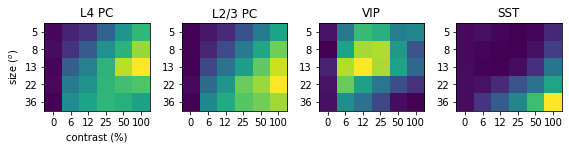

In [14]:
ucontrast = [str(c) for c in np.array((0,6,12,25,50,100))]
usize = [str(s) for s in (5,8,13,22,36)]
plt.figure(figsize=(8,2))
plt.subplot(1,4,1)
plt.imshow(rl4.mean(0))
plt.title('L4 PC')
plt.xticks(np.arange(6),ucontrast)
plt.yticks(np.arange(5),usize)
plt.xlabel('contrast (%)')
plt.ylabel('size ($^o$)')
plt.subplot(1,4,2)
plt.imshow(rpc.mean(0))
plt.title('L2/3 PC')
plt.xticks(np.arange(6),ucontrast)
plt.yticks(np.arange(5),usize)
plt.subplot(1,4,3)
plt.imshow(np.nanmean(rvip,0))
plt.title('VIP')
plt.xticks(np.arange(6),ucontrast)
plt.yticks(np.arange(5),usize)
plt.subplot(1,4,4)
plt.imshow(np.nanmean(rsst,0))
plt.tight_layout()
plt.title('SST')
plt.xticks(np.arange(6),ucontrast)
plt.yticks(np.arange(5),usize)
# plt.savefig('figures/size_contrast_array_with_l4.pdf')

In [15]:
def f_miller_troyer(mu,s2):
    u = mu/np.sqrt(2*s2)
    A = 0.5*mu*(1+ssp.erf(u))
    B = np.sqrt(s2)/np.sqrt(2*np.pi)*np.exp(-u**2)
    return A + B
#     return 0.5*mu*(1+np.exp(u)) + sigma/np.sqrt(2*np.pi)*np.exp(-u**2) # 0.5*mu*(1+ssp.erf(u))

In [16]:
def fit_w(X,y,rate_fn,wm0=None,ws0=None,bounds=None):
    # X is (N,P), y is (N,). Finds w: (P,) weight matrix to explain y as y = f(X(wm),X(ws))
    # f is a static nonlinearity, given as a function of mean and std. of noise
    N,P = X.shape
    def parse_w(w):
        wm = w[:P]
        ws = w[P:]
#         return wm,ws,k
        return wm,ws
    def minusL(w):
#         wm,ws,k = parse_w(w)
        wm,ws = parse_w(w)
        return 0.5*np.sum((rate_fn(X @ wm,X @ ws)-y)**2) # k*
    def minusdLdw(w): 
        # sum in first dimension: (N,1) times (N,1) times (N,P)
        return egrad(minusL)(w)
    
    w0 = np.concatenate((wm0,ws0)) #,(k0,)))
    
    factr=1e7
    epsilon=1e-8
    pgtol=1e-5
    wstar = sop.fmin_l_bfgs_b(minusL,w0,fprime=minusdLdw,bounds=bounds,pgtol=pgtol,factr=factr,epsilon=epsilon)
    
    return wstar

In [17]:
def linearize(f,u0):
    # return a function that evaluates the Taylor expansion of f about u0
    return lambda u: f(u0) + egrad(f)(u0)*(u-u0)

def linearize_2arg(f,a0,b0):
    # return a function that evaluates the Taylor expansion of f about u0
    return lambda a,b: f(a0,b0) + egrad(f)(a0,b0)*np.array(a-a0,b-b0)

def linearize_karg(f,*x0):
#     return lambda *x: f(*x0) + egrad(f)(*x0)*(np.array((*x))-np.array((*x0)))
    def f_linear(*x):
        return f(*x0) + egrad(f)(*x0)*(np.array((x))-np.array((x0)))
    return f_linear

# def linearize_invert(f,u0):
#     # return a function that evaluates the Taylor expansion of f about u0
#     return lambda v: u0 + (v-f(u0))/egrad(f)(u0)

In [18]:
X_sst = [columnize(arr)[:,np.newaxis] for arr in (rpc,rvip)]
X_sst = np.concatenate(X_sst,axis=1)
X_sst = np.concatenate((X_sst,np.ones((X_sst.shape[0],1))),axis=1)
ind = 2
y_sst = columnize(rsst) # [ind:ind+1]
wm0 = np.array((1,-1,1))
ws0 = np.array((1,-1,1))
wstar = fit_w(X_sst,y_sst,f_miller_troyer,wm0=wm0,ws0=ws0,bounds=None)
wsst = wstar[0]
ym_sst = f_miller_troyer(X_sst.dot(wsst[:3]),X_sst.dot(wsst[3:]))

/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in sqrt
  return f_raw(*args, **kwargs)
/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/autograd/numpy/numpy_vjps.py:97: RuntimeWarning: invalid value encountered in power
  defvjp(anp.sqrt,    lambda ans, x : lambda g: g * 0.5 * x**-0.5)


In [19]:
def display_model_fit(y,ym):
    plt.figure()
    plt.subplot(1,2,1)
    sca.show_size_contrast(y.reshape((5,6)))
    plt.clim(vmin=y.min(),vmax=y.max())
#     plt.imshow(y.reshape((5,6)),vmax=y.max())
    plt.subplot(1,2,2)
    sca.show_size_contrast(ym.reshape((5,6)))
    plt.clim(vmin=y.min(),vmax=y.max())
#     plt.imshow(ym.reshape((5,6)),vmax=y.max())
    plt.figure()
    sca.scatter_size_contrast(y,ym)
    plt.plot((0,1),(0,1),c='r')
    plt.xlabel('measured')
    plt.ylabel('modeled')

Text(0.5, 1.0, 'SST')

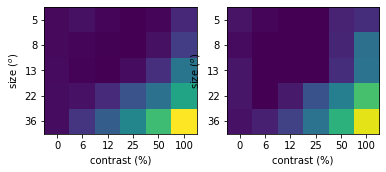

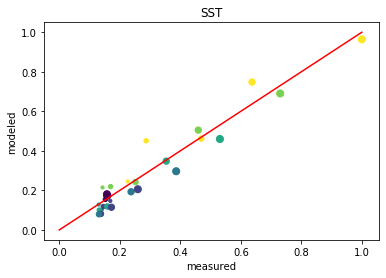

In [27]:
display_model_fit(y_sst,ym_sst)
plt.title('SST')
# plt.savefig('figures/sst_measured_modeled_mt.pdf')

In [28]:
X_vip = [columnize(arr)[:,np.newaxis] for arr in (rpc,rl4,rsst)]
X_vip = np.concatenate(X_vip,axis=1)
X_vip = np.concatenate((X_vip,np.ones((X_vip.shape[0],1))),axis=1)
y_vip = columnize(rvip)
wm0 = np.array((1,1,-1,1))
ws0 = np.array((1,1,-1,1))
wstar = fit_w(X_vip,y_vip,f_miller_troyer,wm0=wm0,ws0=ws0,bounds=None)
wvip = wstar[0]
ym_vip = f_miller_troyer(X_vip.dot(wvip[:wm0.size]),X_vip.dot(wvip[wm0.size:wm0.size+ws0.size]))

Text(0.5, 1.0, 'VIP')

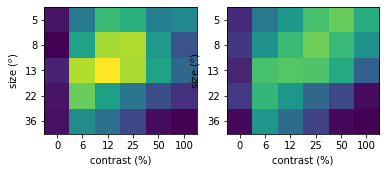

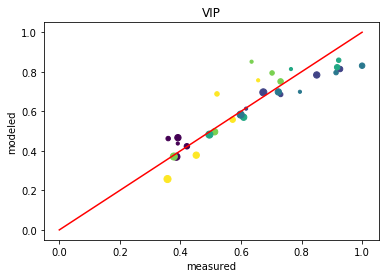

In [29]:
display_model_fit(y_vip,ym_vip)
plt.title('VIP')
# plt.savefig('figures/vip_measured_modeled_mt.pdf')

In [30]:
X_pc = [columnize(arr)[:,np.newaxis] for arr in (rl4,rsst)]
X_pc = np.concatenate(X_pc,axis=1)
X_pc = np.concatenate((X_pc,np.ones((X_pc.shape[0],1))),axis=1)
y_pc = columnize(rpc)
wm0 = np.array((1,-1,1))
ws0 = np.array((1,-1,1))
wstar = fit_w(X_pc,y_pc,f_miller_troyer,wm0=wm0,ws0=ws0,bounds=None)
wpc = wstar[0]
ym_pc = f_miller_troyer(X_pc.dot(wpc[:wm0.size]),X_pc.dot(wpc[wm0.size:wm0.size+ws0.size]))

Text(0.5, 1.0, 'PC')

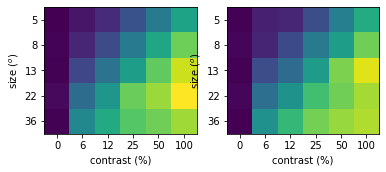

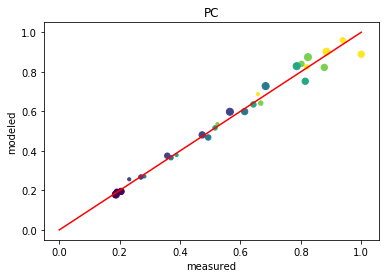

In [31]:
display_model_fit(y_pc,ym_pc)
plt.title('PC')
# plt.savefig('figures/pc_measured_modeled_mt.pdf')

In [32]:
# find ML columns of wx,wy one by one from data: Ydata ~ Y = f(Xwx + Ywy)
# 1. linearize around Y = f(Xwx + Ywy) and find new ML wx,xy
# 2. solve Y = f(Xwx + Ywy) exactly for fixed wx,wy
# repeat from 1.

In [33]:
def compute_Y_nonlinear(X,Wmx,Wmy,Wsx,Wsy,s02,f,Y0=None,bounds=None,stop_early=False):
    factr=1e7
    epsilon=1e-8
    pgtol=1e-5
    
#     def parse_W(W): 
#         Wx = W[:nP*nQ].reshape((nP,nQ))
#         Wy = W[nP*nQ:].reshape((nQ,nQ))
#         return Wx,Wy
    
    def parse_Y(Y):
        return Y.reshape((nN,nQ))

    
#     Wx,Wy = parse_W(W)
    nN,nQ = Y0.shape
    
    Ystar = [None]*nN
    
    for i in range(nN):
        def minusL(y):
            def u_fn(Wx,Wy):
                return X[i] @ Wx + y @ Wy
            return 0.5*np.sum((f(u_fn(Wmx,Wmy),u_fn(Wsx,Wsy)**2+s02) - y)**2)

        def minusdLdy(y):
            return egrad(minusL)(y)
        
        if stop_early:
            maxiter = 25
        else:
            maxiter = 15000
        Ystar[i] = sop.fmin_l_bfgs_b(minusL,Y0[i],fprime=minusdLdy,bounds=bounds,pgtol=pgtol,factr=factr,epsilon=epsilon,maxiter=maxiter)
    
    return np.array([el[0] for el in Ystar]),Ystar

In [34]:
# offset = 0
# wxfactor = 1e-2
# wyfactor = 1e-3
# W0my = np.array(((0,wsst[offset+1]),(wvip[offset+1],0)))*wyfactor
# W0mx = np.concatenate((wsst[[offset+0,offset+2],np.newaxis],wvip[[offset+0,offset+2],np.newaxis]),axis=1)*wxfactor
# offset = 3
# W0sy = np.array(((0,wsst[offset+1]),(wvip[offset+1],0)))*wyfactor
# W0sx = np.concatenate((wsst[[offset+0,offset+2],np.newaxis],wvip[[offset+0,offset+2],np.newaxis]),axis=1)*wxfactor
Yhat = np.concatenate((y_pc[:,np.newaxis],y_sst[:,np.newaxis],y_vip[:,np.newaxis]),axis=1)
X = columnize(rl4)[:,np.newaxis]
X = np.concatenate((X,np.ones_like(X)),axis=1)
nN,nP = X.shape
nQ = Yhat.shape[1]
W0mx = np.zeros((nP,nQ))
W0my = np.zeros((nQ,nQ))
W0sx = np.zeros((nP,nQ))
W0sy = np.zeros((nQ,nQ))
s020 = np.zeros((nQ,))
W0s = [W0mx,W0my,W0sx,W0sy,s020]

In [147]:
Wstar_dict = np.load('w_over_time_miller_troyer_data_loss_sgd_momentum.npy',allow_pickle=True)[()]
Ws = [Wstar_dict[ww][-1] for ww in Wstar_dict.keys()]

In [148]:
def u_fn(Wx,Wy,Y):
    return X @ Wx + Y @ Wy

def evaluate_f_mt(Ws,offset):
    return f_miller_troyer(u_fn(Ws[0],Ws[1],Ws[-3])+offset,Ws[4])

In [149]:
alphas = np.linspace(-2,2,1001)
yalpha = evaluate_f_mt(Ws,alphas[:,np.newaxis,np.newaxis]*u_fn(Ws[2],Ws[3],Ws[-3]))

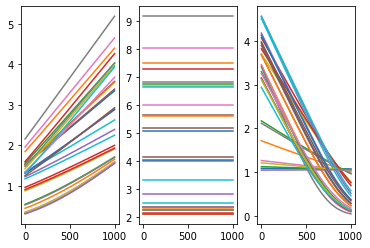

In [150]:
plt.figure()
for j in range(3):
    plt.subplot(1,3,j+1)
#     plt.plot(yalpha[:,:,j]/yalpha[:,:,j].sum(1)[:,np.newaxis])
    plt.plot(yalpha[:,:,j])

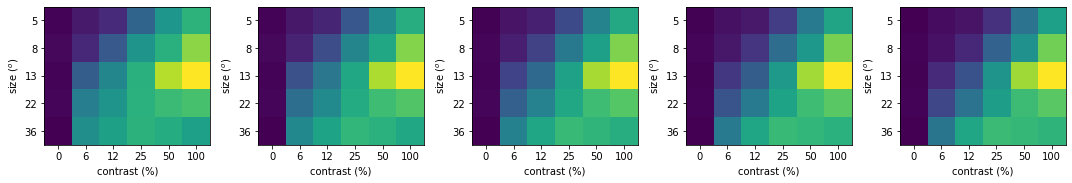

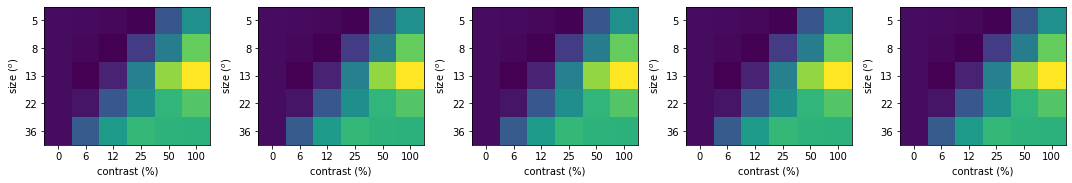

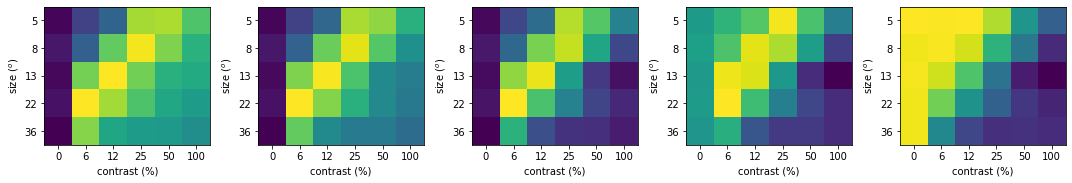

In [158]:
for j in range(3):
    plt.figure(figsize=(15,3))
    for i in range(5):
        plt.subplot(1,5,i+1)
        sca.show_size_contrast((yalpha[200*i+100,:,j]/yalpha[100*i,:,j].sum()).reshape((5,6)))
        plt.tight_layout()

In [112]:
yalphanorm = yalpha/yalpha.sum(1)[:,np.newaxis]
yalphanorm[:,np.newaxis,:,0].shape
# Rpc[ind][np.newaxis].shape

(1001, 1, 30)

In [113]:
def norm01(x):
    return (x-x.min())/(x.max()-x.min())

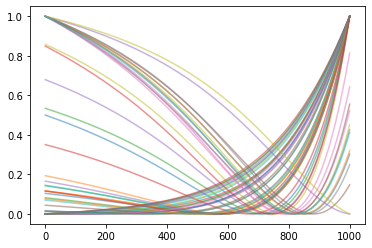

In [114]:
plt.figure()
j = 2
for ind in range(0,1000,20):
    difference = ((yalphanorm[:,:,j]-Rs[j][ind][np.newaxis])**2).sum(1)
    plt.plot(norm01(difference),alpha=0.5)
# plt.plot(yalpha[:,:,0])

In [115]:
j = 2
difference = ((yalphanorm[np.newaxis,:,:,j]-Rs[j][:][:,np.newaxis])**2).sum(2)

In [116]:
Y.shape

NameError: name 'Y' is not defined

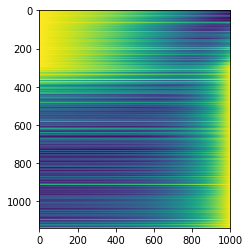

In [162]:
plt.figure()
sortby = np.argsort(difference[:,-1]-difference[:,0])
plt.imshow(difference[sortby]/difference[sortby].max(1)[:,np.newaxis])

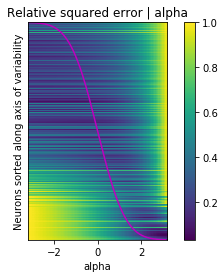

In [178]:
plt.figure()
abd = 3.2
for j in range(2,3):
#     plt.subplot(1,3,j+1)
    yalpha11 = evaluate_f_mt(Ws,np.linspace(-abd,abd,101)[:,np.newaxis,np.newaxis]*u_fn(Ws[2],Ws[3],Ws[-3])) #[:,:,j]
    yalpha11 = yalpha11/yalpha11.sum(1)[:,np.newaxis]
    difference11 = ((yalpha11[np.newaxis,:,:,j]-Rs[j][:][:,np.newaxis])**2).sum(2)
    sortby11 = np.argsort(difference11[:,25]-difference11[:,-25])
    plt.imshow(difference11[sortby11]/difference11[sortby11].max(1)[:,np.newaxis],extent=[-abd,abd,0,10])
    N = Rs[j].shape[0]
    alpha_N = sst.norm.ppf(np.arange(1,N+1)/(N+1))
    plt.plot(-alpha_N,10*np.arange(N)/N,c='m')
    plt.yticks(())
    plt.ylabel('Neurons sorted along axis of variability')
    plt.xlabel('alpha')
    plt.colorbar()
    plt.title('Relative squared error | alpha')
plt.savefig('figures/vip_variability_alpha_plot.pdf')

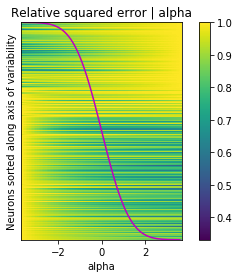

In [179]:
plt.figure()
abd = 3.7
for j in range(0,1):
#     plt.subplot(1,3,j+1)
    yalpha11 = evaluate_f_mt(Ws,np.linspace(-abd,abd,101)[:,np.newaxis,np.newaxis]*u_fn(Ws[2],Ws[3],Ws[-3])) #[:,:,j]
    yalpha11 = yalpha11/yalpha11.sum(1)[:,np.newaxis]
    difference11 = ((yalpha11[np.newaxis,:,:,j]-Rs[j][:][:,np.newaxis])**2).sum(2)
    sortby11 = np.argsort(difference11[:,25]-difference11[:,-25])
    plt.imshow(difference11[sortby11]/difference11[sortby11].max(1)[:,np.newaxis],extent=[-abd,abd,0,10])
    N = Rs[j].shape[0]
    alpha_N = sst.norm.ppf(np.arange(1,N+1)/(N+1))
    plt.plot(-alpha_N,10*np.arange(N)/N,c='m')
    plt.yticks(())
    plt.ylabel('Neurons sorted along axis of variability')
    plt.xlabel('alpha')
    plt.colorbar()
    plt.title('Relative squared error | alpha')
plt.savefig('figures/l23_pc_variability_alpha_plot.pdf')

<IPython.core.display.Javascript object>


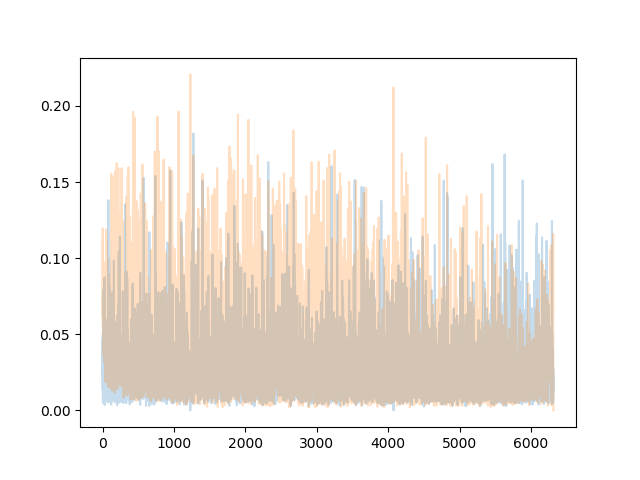

(0.02519591176456216, 0.03377386859804841)


/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


<IPython.core.display.Javascript object>


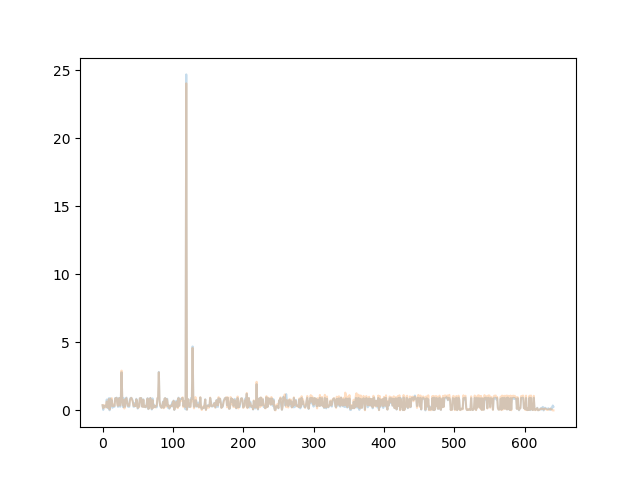

(0.5564577673709544, 0.5872766979923614)


<IPython.core.display.Javascript object>


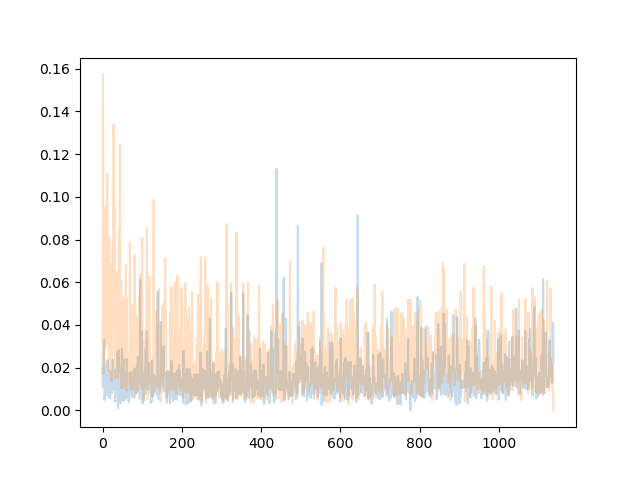

(0.01468283692892277, 0.023664914570017334)


In [366]:
for j in range(3):
    N = Rs[j].shape[0]
    plt.figure()

    yalpha11 = evaluate_f_mt(Ws,np.array((-1,1))[:,np.newaxis,np.newaxis]*u_fn(Ws[2],Ws[3],Ws[-2])) #[:,:,j]
    yalpha11 = yalpha11/yalpha11.sum(1)[:,np.newaxis]
    difference11 = ((yalpha11[np.newaxis,:,:,j]-Rs[j][:][:,np.newaxis])**2).sum(2)
    sortby11 = np.argsort(difference11[:,0]-difference11[:,-1])

    alpha_N = sst.norm.ppf(np.arange(1,N+1)/(N+1))
    yalphaN = evaluate_f_mt(Ws,alpha_N[:,np.newaxis,np.newaxis]*u_fn(Ws[2],Ws[3],Ws[-2]))[:,:,j]
    yalphaN = yalphaN/yalphaN.sum(1)[:,np.newaxis]
    differenceN = np.nansum(np.abs(yalphaN-Rs[j][sortby11])**2,axis=1)
    differenceN_unsorted = np.nansum(np.abs(yalphaN-Rs[j])**2,axis=1)

    plt.plot(differenceN[sortby11],alpha=0.25)
    plt.plot(differenceN_unsorted[sortby11],alpha=0.25)
    print((differenceN.mean(),differenceN_unsorted.mean()))
#     plt.ylim((0,10))

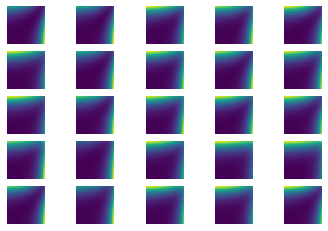

In [108]:
betas = np.logspace(-1,0.5,101)
plt.figure()
for ind in range(25):
    sqdist = ((yalpha[:,np.newaxis,:,0]-Rpc[ind][np.newaxis,np.newaxis]*betas[np.newaxis,:,np.newaxis])**2).sum(-1)
    plt.subplot(5,5,ind+1)
    plt.imshow(sqdist)
    plt.axis('off')

In [94]:
(Rpc[ind][np.newaxis,np.newaxis]*betas[:,np.newaxis,np.newaxis]).shape

(101, 1, 30)